In [21]:
%env DDE_BACKEND=tensorflow
import tensorflow as tf
import deepxde as dde
import numpy as np
import matplotlib.pyplot as plt

env: DDE_BACKEND=tensorflow


In [4]:
rho = 1
mu = 1
u_in = 1
D = 1
L = 2

In [23]:
geom = dde.geometry.Rectangle(xmin=[-L/2,-D/2],xmax=[L/2,D/2])

In [24]:
def boundary_wall(X, on_boundary):
  print("X",X)
  print("on boundary",on_boundary)

  on_wall = np.logical_and(np.logical_or(np.isclose(X[1],-D/2,rtol=1e-05,atol=1e-08),np.isclose(X[1],D/2,rtol=1e-05,atol=1e-08)),on_boundary)
  return on_wall

def boundary_inlet(X,on_boundary):
  on_inlet = np.logical_and(np.isclose(X[0],-L/2,rtol=1e-05,atol=1e-08),on_boundary)
  return on_inlet

def boundary_outlet(X,on_boundary):
  on_outlet = np.logical_and(np.isclose(X[0],L/2,rtol=1e-05,atol=1e-08),on_boundary)
  return on_outlet

In [25]:
bc_wall_u = dde.DirichletBC(geom, lambda X:0., boundary_wall, component =0)
bc_wall_v = dde.DirichletBC(geom, lambda X:0., boundary_wall, component =1)

bc_inlet_u = dde.DirichletBC(geom, lambda X:u_in, boundary_inlet, component =0)
bc_inlet_v = dde.DirichletBC(geom, lambda X:0., boundary_inlet, component =1)

bc_outlet_p = dde.DirichletBC(geom, lambda X:0., boundary_outlet, component =2)
bc_outlet_v = dde.DirichletBC(geom, lambda X:0., boundary_outlet, component =1)



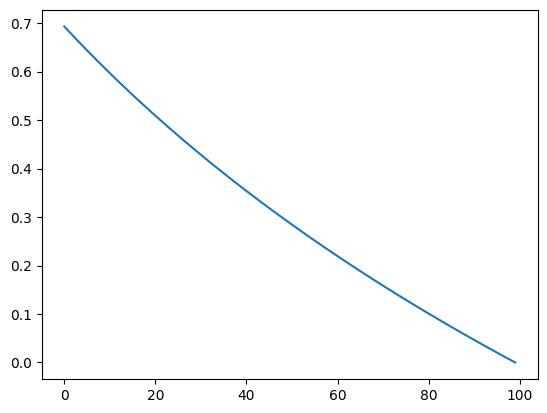

In [31]:
import numpy as np
import matplotlib.pyplot as plt

dp_dx = -10

k = 0.5
R = 1
a = R
b = k * R
r = np.linspace(b, a, 100)
u_analytic = (1 / (4 * mu)) * (- dp_dx)  * (a ** 2 - r ** 2 + ((a ** 2 - b ** 2) / np.log([a / b])[0] * np.log(a / r)))

plt.plot(np.log(a / r))
plt.show()

In [26]:
def pde(X, Y):
    du_x = dde.grad.jacobian(Y, X, i=0, j=0)
    du_y = dde.grad.jacobian(Y, X, i=0, j=1)
    dv_x = dde.grad.jacobian(Y, X, i=1, j=0)
    dv_y = dde.grad.jacobian(Y, X, i=1, j=1)
    dp_x = dde.grad.jacobian(Y, X, i=2, j=0)
    dp_y = dde.grad.jacobian(Y, X, i=2, j=1)
    
    #du_xx = dde.grad.hessian(Y, X, component=0, i=0, j=0)
    #du_yy = dde.grad.hessian(Y, X, component=0, i=1, j=1)
    #dv_xx = dde.grad.hessian(Y, X, component=1, i=0, j=0)
    #dv_yy = dde.grad.hessian(Y, X, component=1, i=1, j=1)

    # Definições para newtoniano para componentes do tensor de tensão
    tau_xy =  mu * (du_y + dv_x)
    tau_yx =  mu * (dv_x + du_y)

    # Derivadas dos tensores de tensão
    #dtau_xy_y = dde.grad.jacobian(tau_xy, X, i=0, j=1)  
    #dtau_yx_x = dde.grad.jacobian(tau_yx, X, i=0, j=0)  
    #dtau_xx_x = dde.grad.jacobian(tau_xx, X, i=0, j=0)  
    #dtau_yy_y = dde.grad.jacobian(tau_yy, X, i=0, j=1)
    dtau_yx_y = dde.grad.jacobian(tau_yx, X, i=0, j=1)
    dtau_xy_x = dde.grad.jacobian(tau_xy, X, i=0, j=0)

    # Termos de advecção para as componentes u e v
    advec_u = Y[:,0:1] * du_x + Y[:,1:2] * du_y
    advec_v = Y[:,0:1] * dv_x + Y[:,1:2] * dv_y

    # Termo viscoso (divergente do tensores de tensão)
    #div_tau_x = dtau_xx_x + dtau_yx_y 
    #div_tau_y = dtau_xy_x + dtau_yy_y

    # Equações de Navier-Stokes modificadas para incluir todos os tensores de tensão
    pde_u = rho * advec_u +  dp_x -  dtau_yx_y
    pde_v = rho * advec_v +  dp_y -  dtau_xy_x
    
    # Equação de continuidade
    pde_cont = du_x + dv_y  

    return [pde_u, pde_v, pde_cont]

In [27]:
data = dde.data.PDE(geom,
                    pde,
                    [bc_wall_u,bc_wall_v,bc_inlet_u,bc_inlet_v,bc_outlet_p,bc_outlet_v],
                    num_domain = 2000,
                    num_boundary = 200,
                    num_test = 200)

X [1.  0.5]
on boundary True
X [ 0.5 -0.5]
on boundary True
X [-0.5  0.5]
on boundary True
X [-0.25 -0.5 ]
on boundary True
X [0.25 0.5 ]
on boundary True
X [ 1.   -0.25]
on boundary True
X [-1.    0.25]
on boundary True
X [-0.625 -0.5  ]
on boundary True
X [0.625 0.5  ]
on boundary True
X [ 0.875 -0.5  ]
on boundary True
X [-0.875  0.5  ]
on boundary True
X [ 0.125 -0.5  ]
on boundary True
X [-0.125  0.5  ]
on boundary True
X [1.    0.125]
on boundary True
X [-1.    -0.125]
on boundary True
X [-0.8125 -0.5   ]
on boundary True
X [0.8125 0.5   ]
on boundary True
X [ 0.6875 -0.5   ]
on boundary True
X [-0.6875  0.5   ]
on boundary True
X [-0.0625 -0.5   ]
on boundary True
X [0.0625 0.5   ]
on boundary True
X [ 1.     -0.0625]
on boundary True
X [-1.      0.0625]
on boundary True
X [-0.4375 -0.5   ]
on boundary True
X [0.4375 0.5   ]
on boundary True
X [ 1.     -0.4375]
on boundary True
X [-1.      0.4375]
on boundary True
X [ 0.3125 -0.5   ]
on boundary True
X [-0.3125  0.5   ]
on bound

<function matplotlib.pyplot.show(close=None, block=None)>

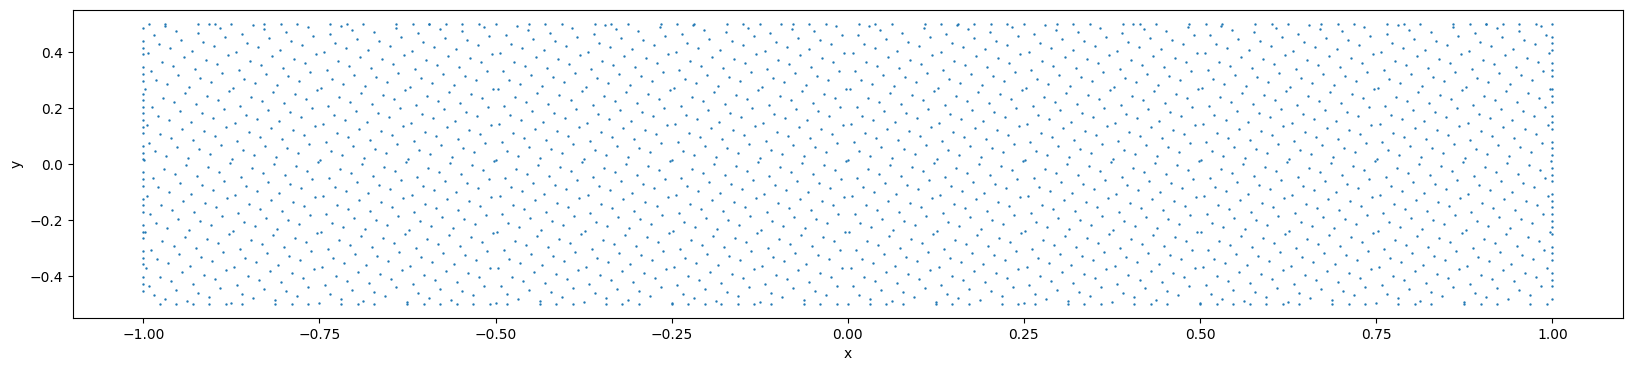

In [28]:
plt.figure(figsize=(20,4))
plt.scatter(data.train_x_all[:,0],data.train_x_all[:,1],s=0.5)
plt.xlabel("x")
plt.ylabel("y")
plt.show

In [29]:
net = dde.maps.FNN([2]+[64]*5+[3], "tanh","Glorot uniform")


In [30]:
model = dde.Model(data, net)
model.compile("adam", lr=1e-3)

Compiling model...
'compile' took 0.000971 s



In [31]:
losshistory,train_state = model.train(epochs = 10000, display_every=1000)

Training model...



c:\Users\Matuchaki\AppData\Local\pypoetry\Cache\virtualenvs\deepxde-custom-E_cFIhQu-py3.10\lib\site-packages\keras\initializers\initializers_v2.py:120: UserWarning: The initializer GlorotUniform is unseeded and being called multiple times, which will return identical values  each time (even if the initializer is unseeded). Please update your code to provide a seed to the initializer, or avoid using the same initalizer instance more than once.
  warnings.warn(


Cause: could not parse the source code of <function <lambda> at 0x0000016948F65630>: no matching AST found among candidates:
# coding=utf-8
lambda x, on: np.array([on_boundary(x[i], on[i]) for i in range(len(x))])
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
Cause: could not parse the source code of <function <lambda> at 0x0000016948F65630>: no matching AST found among candidates:
# coding=utf-8
lambda x, on: np.array([on_boundary(x[i], on[i]) for i in range(len(x))])
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
Cause: could not parse the source code of <function <lambda> at 0x0000016948F65900>: no matching AST found among candidates:
# coding=utf-8
lambda x, on: np.array([on_boundary(x[i], on[i]) for i in range(len(x))])
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
Cause: could not parse the source code of <function <lambda> at 0x0000016948

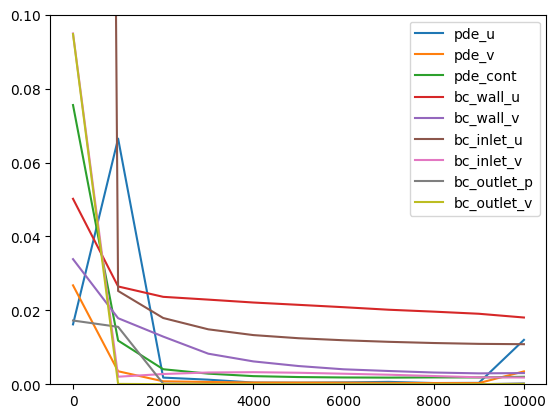

In [32]:

plot_array = np.array(losshistory.loss_test)
plot_labels = ["pde_u", "pde_v", "pde_cont", "bc_wall_u", "bc_wall_v", "bc_inlet_u", "bc_inlet_v", "bc_outlet_p", "bc_outlet_v"]
# plot_array = np.array(losshistory.loss_train)
for i in range(plot_array.shape[1]):
    plt.plot(losshistory.steps, plot_array[:,i], label=plot_labels[i])
    
plt.legend()
plt.ylim([0, 0.1])
plt.show()

In [33]:
dde.optimizers.config.set_LBFGS_options(maxiter = 3000)
model.compile("L-BFGS")
losshistory,train_state = model.train()
dde.saveplot(losshistory, train_state, issave = False , isplot = False)

Compiling model...
'compile' took 0.072532 s

Training model...

Step      Train loss                                                                                    Test loss                                                                                     Test metric
10000     [1.37e-02, 4.12e-03, 2.08e-03, 1.81e-02, 3.03e-03, 1.08e-02, 1.83e-03, 2.48e-04, 5.04e-05]    [1.20e-02, 3.49e-03, 2.02e-03, 1.81e-02, 3.03e-03, 1.08e-02, 1.83e-03, 2.48e-04, 5.04e-05]    []  
13000     [5.97e-04, 4.91e-04, 5.09e-04, 3.08e-03, 3.52e-04, 2.30e-03, 1.60e-04, 1.33e-06, 3.95e-06]    [5.14e-04, 4.94e-04, 3.47e-04, 3.08e-03, 3.52e-04, 2.30e-03, 1.60e-04, 1.33e-06, 3.95e-06]    []  

Best model at step 13000:
  train loss: 7.50e-03
  test loss: 7.25e-03
  test metric: []

'train' took 1280.285587 s



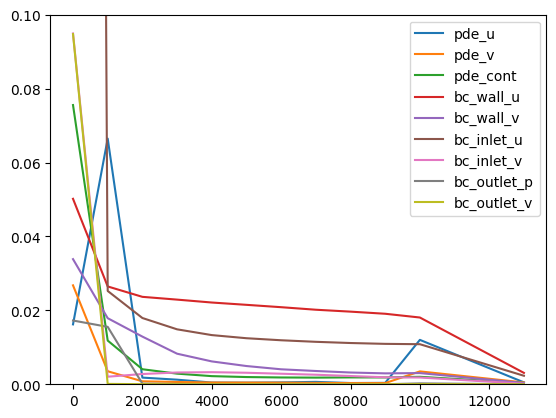

In [34]:
plot_array = np.array(losshistory.loss_test)
plot_labels = ["pde_u", "pde_v", "pde_cont", "bc_wall_u", "bc_wall_v", "bc_inlet_u", "bc_inlet_v", "bc_outlet_p", "bc_outlet_v"]
# plot_array = np.array(losshistory.loss_train)
for i in range(plot_array.shape[1]):
    plt.plot(losshistory.steps, plot_array[:,i], label=plot_labels[i])
    
plt.legend()
plt.ylim([0, 0.1])
plt.show()

In [35]:
samples= geom.random_points(500000)
result = model.predict(samples)

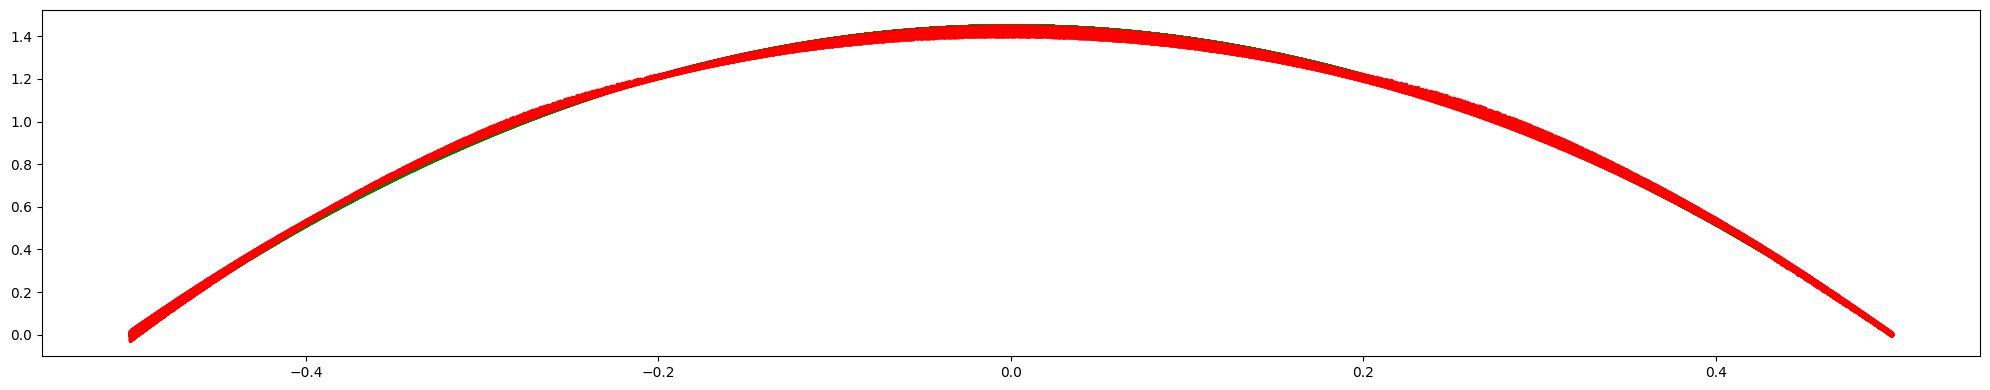

In [36]:
color_legend=[[0,1.5],[-0.3,0.3],[0,35]]
# for idx in range(3):
plt.figure(figsize=(20,4))
mask = np.where((samples[:,0] > (D/2 - 0.15)) & (samples[:,0] < (L/2 - 0.15)))
plt.scatter(samples[mask,1], result[mask,0], c='green',s=2)
mask = np.where((samples[:,0] < -(D/2 - 0.7)) & (samples[:,0] > -(L/2 - 0.7)))
plt.scatter(samples[mask,1], result[mask,0], c='red',s=2)
plt.tight_layout()
plt.show()

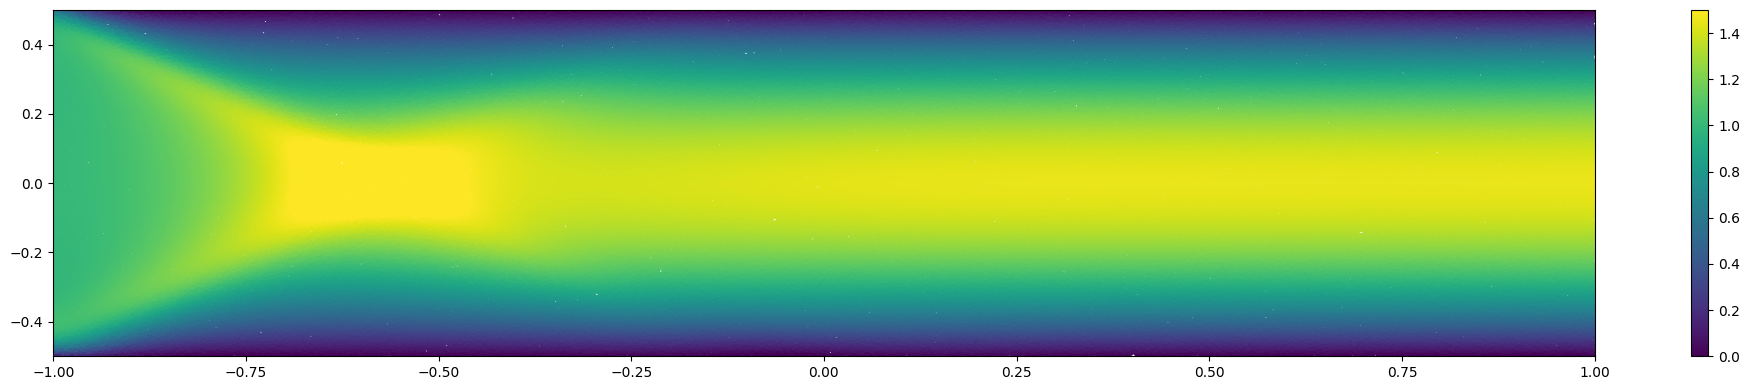

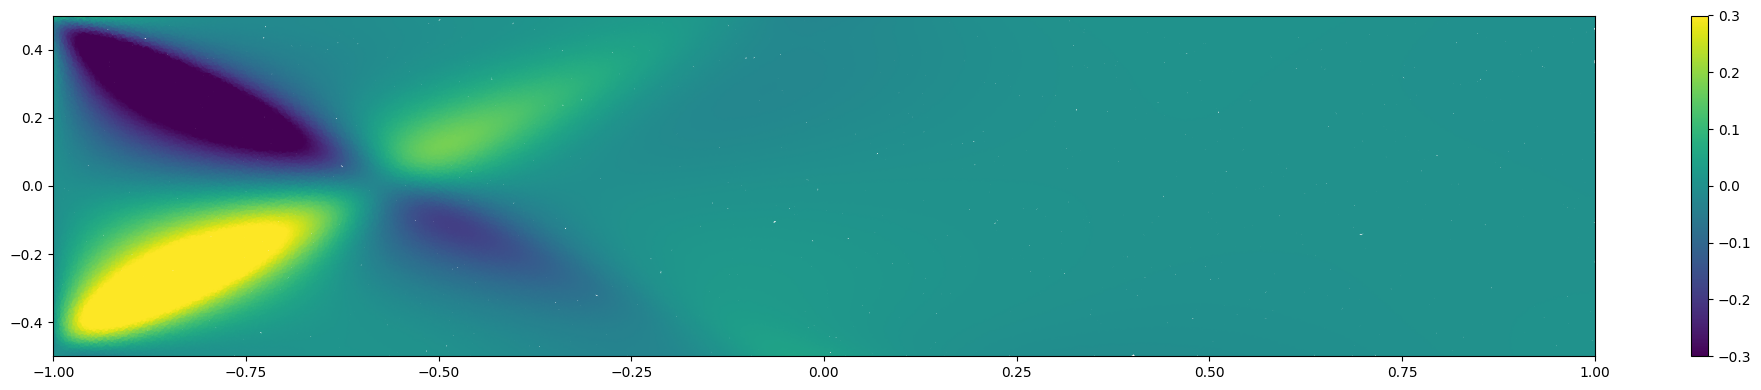

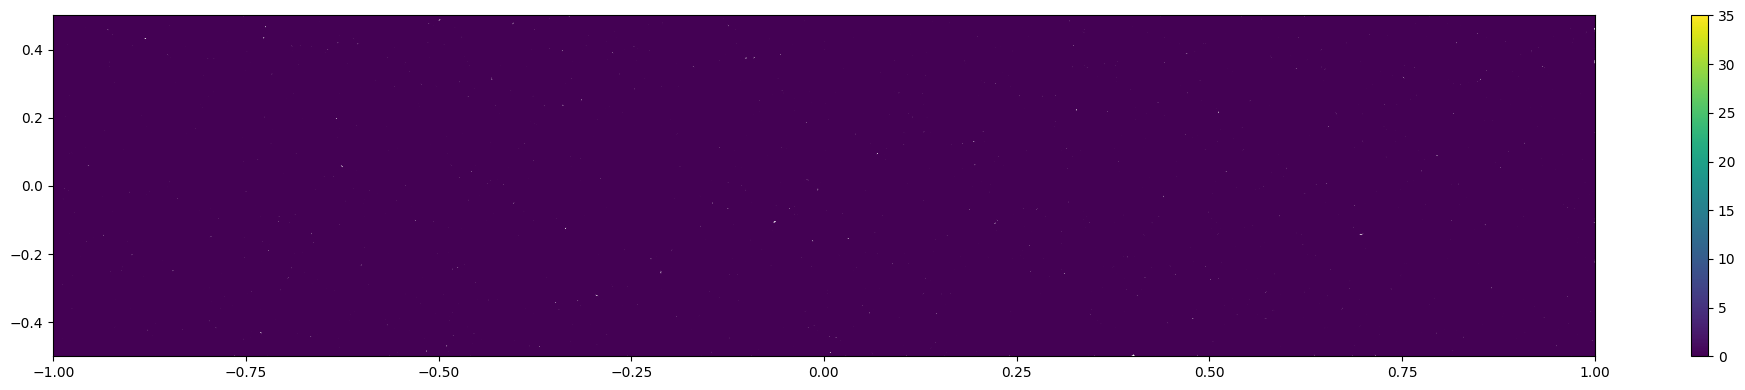

In [38]:
color_legend = [[0,1.5],[-0.3,0.3],[0,35]]

for idx in range(3):
    plt.figure(figsize=(20,4))
    plt.scatter(samples[:,0],
               samples[:,1],
               c = result[:,idx],
               cmap= 'viridis',
               s=2)
    plt.colorbar()
    plt.clim(color_legend[idx])
    plt.xlim((0-L/2, L-L/2))
    plt.ylim((0-D/2, D-D/2))
    plt.tight_layout()
    plt.show()